In [11]:
!pip install langgraph langsmith

In [12]:
!pip install langchain langchain_groq langchain_community

In [13]:
from google.colab import userdata
groq_api_key = userdata.get ("groq_api_key")
langsmith = userdata.get ("LANGSMITH_API_KEY")

In [15]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "langGraph_chatbot"
os.environ["GROQ_API_KEY"] = groq_api_key

In [17]:
from langchain_groq import ChatGroq
llm = ChatGroq (model = "llama-3.3-70b-versatile")

# Start Building ChatBot Using LangGraph

In [18]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [19]:
class State(TypedDict): # class State inheriting the TypedDict class
  messages: Annotated[list, add_messages]
  # meesages have the type "list" and "add_messages" as function
  # in the annotation defines how the state key should be updated
  # in this case, it appends the messages rather than overwriting them
  # every add changes the state

graph_builder = StateGraph(State) # this graph builder should be responsible for entire graph management

In [20]:
graph_builder

In [23]:
def chatbot (state : State): # chatbot class inheriting the state class
  return {"messages" : llm.invoke (state['messages'])}

In [24]:
graph_builder.add_node ("chatbot", chatbot)

In [25]:
graph_builder.add_edge (START, "chatbot")
graph_builder.add_edge ("chatbot", END)

In [26]:
graph = graph_builder.compile()

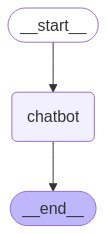

In [28]:
from IPython.display import Image, display
try:
  display (Image (graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [32]:
while True:
  user_input = input ("User: ")
  if user_input.lower() in ["quit", "q"]:
    print ("Good Bye!")
    break
  for event in graph.stream ({'messages' : ("user", user_input)}):
    print (event.values())
    for value in event.values():
      print (value['messages'])
      print ("Assistant: ", value["messages"].content)

User: hello
dict_values([{'messages': AIMessage(content='Hello. How can I help you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.036363636, 'prompt_time': 0.001670203, 'queue_time': 0.220233225, 'total_time': 0.038033839}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'finish_reason': 'stop', 'logprobs': None}, id='run--14e2c0df-f843-4b77-857f-32525ea616b4-0', usage_metadata={'input_tokens': 36, 'output_tokens': 10, 'total_tokens': 46})}])
content='Hello. How can I help you today?' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.036363636, 'prompt_time': 0.001670203, 'queue_time': 0.220233225, 'total_time': 0.038033839}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'finish_reason': 'stop', 'logprobs': None} id='run--14e